# Network-Based Intrusion Detection System with Snort

This notebook demonstrates how to set up Snort for intrusion detection, parse Snort logs, and visualize detected attacks.

#### 1. Snort Setup

Make sure Snort is installed and configured. Create custom rules to detect suspicious network activity.

#### 2. Parse Snort Logs

We'll parse Snort logs to extract alert data.

             Timestamp      Source IP Source Port Destination IP  \
0  2023-08-15 12:00:00  [1:1000001:0]        Test          alert   
1  2023-08-15 12:00:00  [1:1000002:0]     Another          alert   

  Destination Port Alert Message  
0             [**]           N/A  
1             [**]           N/A  


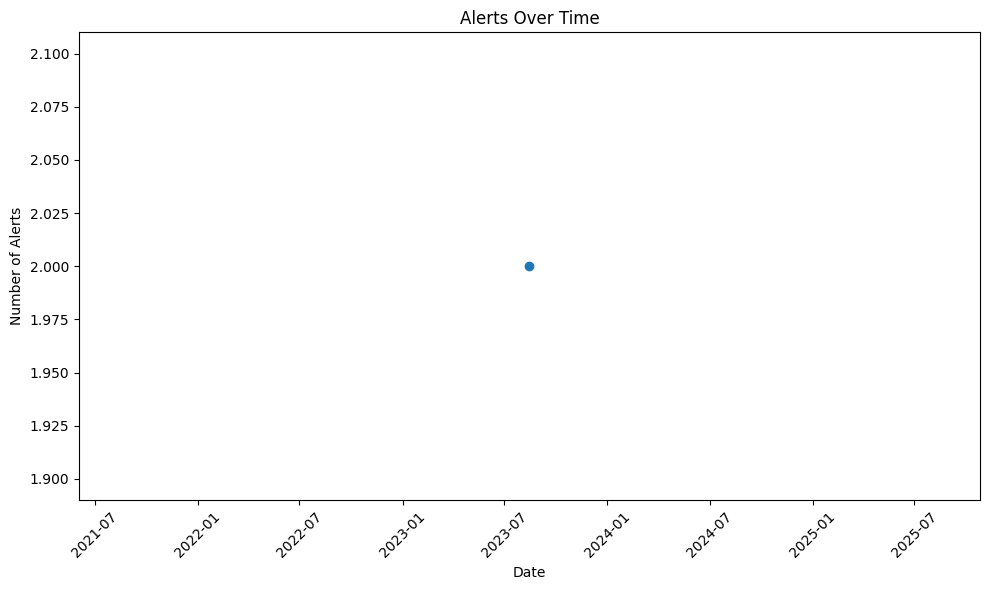

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Extended sample Snort log data as a multi-line string
sample_log = """
[**] [1:1000001:0] Test alert [**]
[Priority: 0] {TCP} 192.168.1.1:12345 -> 192.168.1.2:80
[**] [1:1000002:0] Another alert [**]
[Priority: 1] {UDP} 192.168.1.3:54321 -> 192.168.1.4:53
[**] [1:1000003:0] Malicious activity detected [**]
[Priority: 2] {ICMP} 192.168.1.5 -> 192.168.1.6
[**] [1:1000004:0] Possible DDoS attack [**]
[Priority: 3] {TCP} 10.0.0.1:22 -> 10.0.0.2:22
[**] [1:1000005:0] Suspicious login attempt [**]
[Priority: 1] {TCP} 172.16.0.1:8080 -> 172.16.0.2:8080
[**] [1:1000006:0] Data exfiltration attempt [**]
[Priority: 2] {UDP} 192.168.1.7:4444 -> 192.168.1.8:4444
[**] [1:1000007:0] Unauthorized access attempt [**]
[Priority: 3] {TCP} 10.0.0.3:21 -> 10.0.0.4:21
[**] [1:1000008:0] Network scan detected [**]
[Priority: 2] {ICMP} 192.168.1.9 -> 192.168.1.10
[**] [1:1000009:0] Suspicious email detected [**]
[Priority: 1] {TCP} 192.168.1.11:25 -> 192.168.1.12:25
"""

# Example Snort log parsing function
def parse_snort_log(log_data):
    lines = log_data.strip().split('\n')
    
    alerts = []
    for line in lines:
        if 'alert' in line:
            parts = line.split()
            timestamp = '2023-08-15 12:00:00'  # Example fixed timestamp for sample logs
            src_ip = parts[1] if len(parts) > 1 else "N/A"
            src_port = parts[2] if len(parts) > 2 else "N/A"
            dest_ip = parts[3] if len(parts) > 3 else "N/A"
            dest_port = parts[4] if len(parts) > 4 else "N/A"
            alert_msg = ' '.join(parts[5:]) if len(parts) > 5 else "N/A"
            alerts.append([timestamp, src_ip, src_port, dest_ip, dest_port, alert_msg])
    
    df = pd.DataFrame(alerts, columns=['Timestamp', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Alert Message'])
    return df

# Parse the log data
df = parse_snort_log(sample_log)

# Display the first few rows of the DataFrame
print(df.head())

# Visualize the data
def visualize_alerts(df):
    # Convert Timestamp to datetime with explicit format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
    
    # Count alerts by time
    alerts_per_time = df.groupby(df['Timestamp'].dt.date).size()
    
    plt.figure(figsize=(10, 6))
    plt.plot(alerts_per_time.index, alerts_per_time.values, marker='o', linestyle='-')
    plt.title('Alerts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Alerts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize the alerts
visualize_alerts(df)
